In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

sns.set_palette("Set2")

In [4]:
df = pd.read_csv("breast-cancer-wisconsin.csv", header=None)
df.columns=['id','thickness','size_uni','shape_uni','adhesion','size','nuclei','chromatin','neucleoli','mitoses','class']

In [5]:
df.head()

,id,thickness,size_uni,shape_uni,adhesion,size,nuclei,chromatin,neucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id           699 non-null int64
thickness    699 non-null int64
size_uni     699 non-null int64
shape_uni    699 non-null int64
adhesion     699 non-null int64
size         699 non-null int64
nuclei       699 non-null object
chromatin    699 non-null int64
neucleoli    699 non-null int64
mitoses      699 non-null int64
class        699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


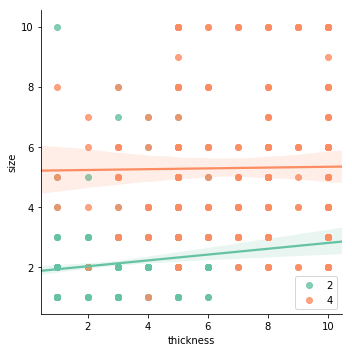

In [7]:
sns.lmplot( x="thickness", y="size", data=df, fit_reg=True, hue='class', legend=False)
plt.legend(loc='lower right')

In [8]:
# Change to 0, 1 for class
df['class'] = np.where(df['class'] == 2, 0, 1)

In [9]:
df.drop("id", axis=1, inplace=True)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors = 3)
x,y = df.drop(['class','nuclei'],axis=1), df['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.9714285714285714


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dtree = DecisionTreeClassifier()
x,y = df.drop(['class','nuclei'],axis=1), df['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
dtree.fit(x_train,y_train)
prediction = dtree.predict(x_test)

print('With Decision tree accuracy is: ',dtree.score(x_test,y_test)) # accuracy

With Decision tree accuracy is:  0.9476190476190476


In [14]:
from sklearn import tree
tree.export_graphviz(dtree, out_file="tree.dot")

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression()
x,y = df.drop(['class','nuclei'],axis=1), df['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)

print('With Logistic Regression accuracy is: ',lr.score(x_test,y_test)) # accuracy

With Logistic Regression accuracy is:  0.9714285714285714
